# 70_viz_compact — 요약 CSV 기반 서브플롯/그리드 시각화
로컬 주피터 환경에서 실행하세요. 각 모듈(Likert, Ordinal-nonLikert, Ranked, Nominal/Ordinal, Binary, Heatmap)을 **서브플롯**으로 한 번에 렌더링합니다.

In [1]:

# 기본 설정
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ==== 분기 선택만, 여기서 바꾸세요 ====
CURRENT_QUARTER = "Q3_2024" # "Q4_2024" "Q1_2025" "Q2_2025"
# ====================================

# === 사용자 입력 ===
PROJECT_PATH = Path.cwd().parent
IN_DIR = PROJECT_PATH / 'output' / '2. SRI시민패널조사'
OUT_DIR = PROJECT_PATH / 'output' / '2. SRI시민패널조사' / CURRENT_QUARTER / 'viz_compact'
TOP_K = 12         # 그리드에 표시할 변수 상한 (용량 절감용)
DPI = 300          # 저장 해상도
FONT_FAMILY = ['Malgun Gothic', 'AppleGothic', 'NanumGothic', 'sans-serif']  # 한글 폰트 후보

OUT_DIR.mkdir(parents=True, exist_ok=True)

# 폰트(가능하면 한글 폰트 적용)
try:
    import matplotlib
    plt.rcParams['font.family'] = FONT_FAMILY
    matplotlib.rcParams['axes.unicode_minus'] = False
except Exception:
    pass

def find_csv(root: Path, name_contains: str):
    cand = sorted([p for p in root.rglob("*.csv") if name_contains in p.name])
    return cand[0] if cand else None

def read_csv_opt(path: Path):
    if path is None: return None
    try:
        return pd.read_csv(path)
    except Exception:
        return None

print("IN_DIR:", IN_DIR.resolve())
print("OUT_DIR:", OUT_DIR.resolve())


IN_DIR: C:\workspace\dacon_sri\output\2. SRI시민패널조사
OUT_DIR: C:\workspace\dacon_sri\output\2. SRI시민패널조사\Q3_2024\viz_compact


In [2]:

# === 그리드 유틸 ===
def grid_bar(ax, x_labels, values, title, ylabel=None, rotate=0):
    ax.bar(x_labels, values)
    ax.set_title(title, fontsize=10)
    if ylabel: ax.set_ylabel(ylabel)
    if rotate:
        ax.set_xticklabels(x_labels, rotation=rotate, ha='right')
    ax.grid(axis='y', alpha=0.3)

def grid_heatmap(ax, df, title):
    im = ax.imshow(df.values.astype(float), aspect='auto')
    ax.set_title(title, fontsize=10)
    ax.set_xticks(np.arange(df.shape[1])); ax.set_xticklabels(df.columns, rotation=45, ha='right', fontsize=8)
    ax.set_yticks(np.arange(df.shape[0])); ax.set_yticklabels(df.index, fontsize=8)
    return im


In [3]:

# === CSV 로딩 ===
df_likert = read_csv_opt(find_csv(IN_DIR, "likert_summary"))
df_onl = read_csv_opt(find_csv(IN_DIR, "ordinal_nonlikert_summary"))
df_ranked = read_csv_opt(find_csv(IN_DIR, "ranked_summary"))
df_nom = read_csv_opt(find_csv(IN_DIR, "categorical_nominal_summary_meta"))
if df_nom is None:
    df_nom = read_csv_opt(find_csv(IN_DIR, "categorical_nominal_summary_quick"))
df_ordcat = read_csv_opt(find_csv(IN_DIR, "categorical_ordinal_summary"))
df_spear = read_csv_opt(find_csv(IN_DIR, "categorical_ordinal_spearman"))
df_bin = read_csv_opt(find_csv(IN_DIR, "binary_summary"))
df_bin_corr = read_csv_opt(find_csv(IN_DIR, "binary_vs_targets_corr"))
gu_q3_ct = find_csv(IN_DIR, "GU_x_q3_crosstab")
gu_q7_ct = find_csv(IN_DIR, "GU_x_q7_crosstab")

{ k: (v.shape if v is not None else None) for k,v in dict(
    likert=df_likert, onl=df_onl, ranked=df_ranked, nominal=df_nom,
    ordcat=df_ordcat, spear=df_spear, bin=df_bin, bin_corr=df_bin_corr
).items() }


{'likert': (11, 12),
 'onl': (20, 4),
 'ranked': (5, 3),
 'nominal': (88, 4),
 'ordcat': (88, 4),
 'spear': (30, 5),
 'bin': (18, 3),
 'bin_corr': (36, 4)}

## Likert — Top/Neutral/Bottom & NSS

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

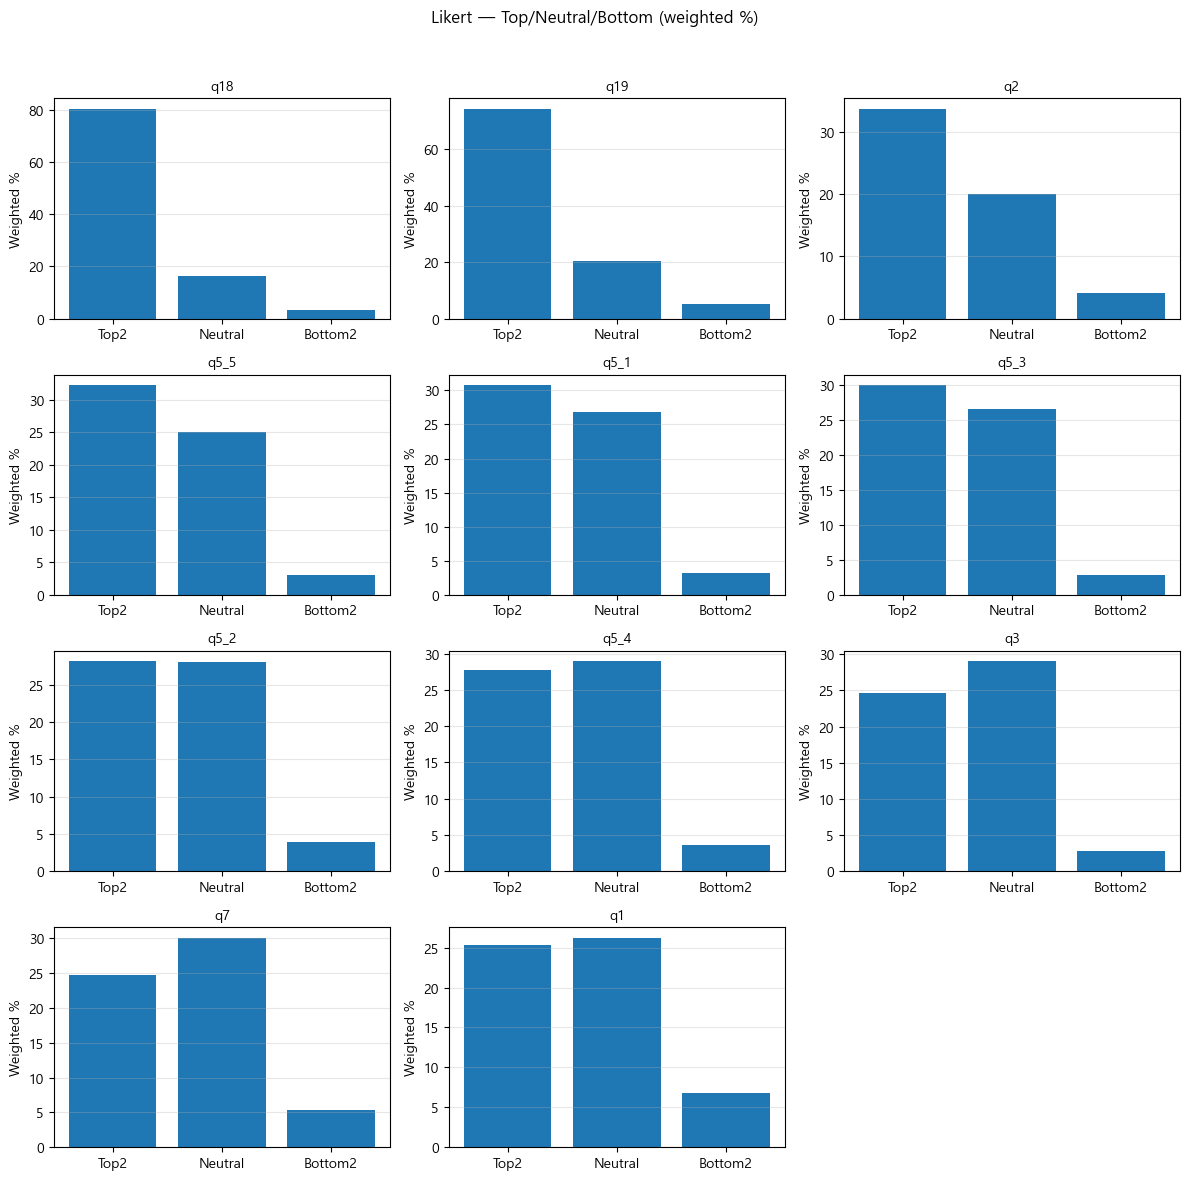

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

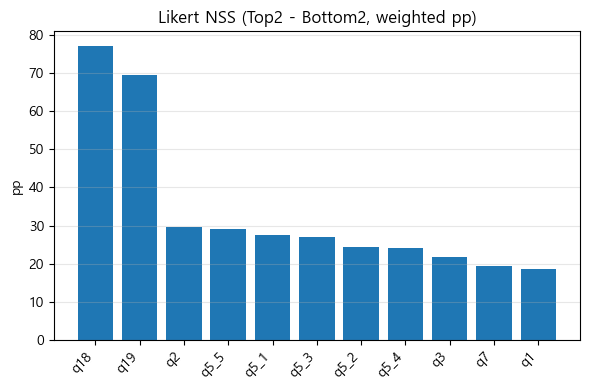

In [4]:

if df_likert is not None and not df_likert.empty:
    lk = df_likert.copy()
    if "weighted_NSS_pp" in lk.columns:
        lk = lk.sort_values("weighted_NSS_pp", ascending=False)
    if TOP_K and TOP_K>0:
        lk = lk.head(TOP_K)

    n = len(lk); cols=3; rows=int(np.ceil(n/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten() if n>1 else [axes]

    for i, (_, r) in enumerate(lk.iterrows()):
        x = ["Top2","Neutral","Bottom2"]
        y = [r.get("weighted_top2_%", np.nan), r.get("weighted_neutral_%", np.nan), r.get("weighted_bottom2_%", np.nan)]
        grid_bar(axes[i], x, y, f"{r['variable']}", ylabel="Weighted %")
    for j in range(i+1, rows*cols):
        axes[j].axis('off')

    fig.suptitle("Likert — Top/Neutral/Bottom (weighted %)", fontsize=12)
    fig.tight_layout(rect=[0,0,1,0.96])
    fig.savefig(OUT_DIR/"likert_TNB_grid.png", dpi=DPI)

    # NSS 랭킹
    fig, ax = plt.subplots(figsize=(max(6, 0.4*len(lk)), 4))
    ax.bar(lk["variable"].astype(str), lk["weighted_NSS_pp"].astype(float))
    ax.set_title("Likert NSS (Top2 - Bottom2, weighted pp)")
    ax.set_ylabel("pp")
    ax.set_xticklabels(lk["variable"].astype(str), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    fig.tight_layout()
    fig.savefig(OUT_DIR/"likert_NSS_rank.png", dpi=DPI)


## Ordinal-nonLikert — Weighted distribution

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

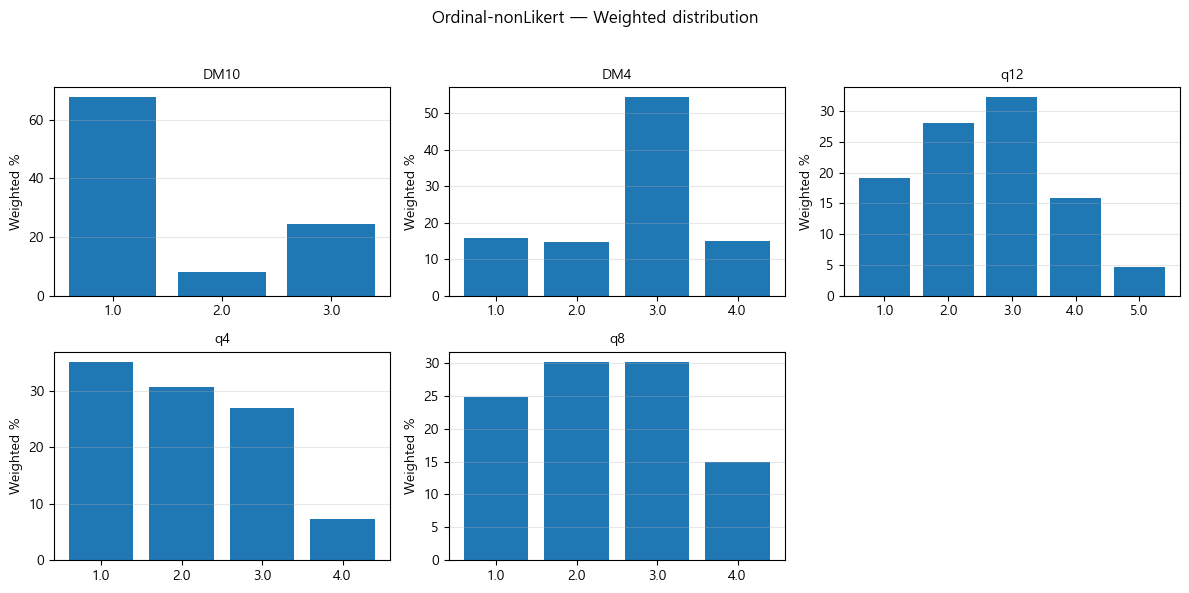

In [5]:

if df_onl is not None and not df_onl.empty:
    vars_ord = sorted(df_onl["variable"].astype(str).unique().tolist())
    if TOP_K and TOP_K>0:
        vars_ord = vars_ord[:TOP_K]
    n = len(vars_ord); cols=3; rows=int(np.ceil(n/cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten() if n>1 else [axes]

    for i, v in enumerate(vars_ord):
        sub = df_onl[df_onl["variable"].astype(str)==v].copy()
        sub["level_order"] = pd.to_numeric(sub["level"], errors="coerce")
        sub = sub.sort_values(["level_order","level"])
        grid_bar(axes[i], sub["level"].astype(str).tolist(), sub["weighted_%"].astype(float).tolist(),
                 f"{v}", ylabel="Weighted %")
    for j in range(i+1, rows*cols):
        axes[j].axis('off')

    fig.suptitle("Ordinal-nonLikert — Weighted distribution", fontsize=12)
    fig.tight_layout(rect=[0,0,1,0.96])
    fig.savefig(OUT_DIR/"ordinal_nonlikert_grid.png", dpi=DPI)


## Ranked — Weighted mean score

C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\1386907031.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(rk["variable"].astype(str), rotation=45, ha='right')
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'Nan

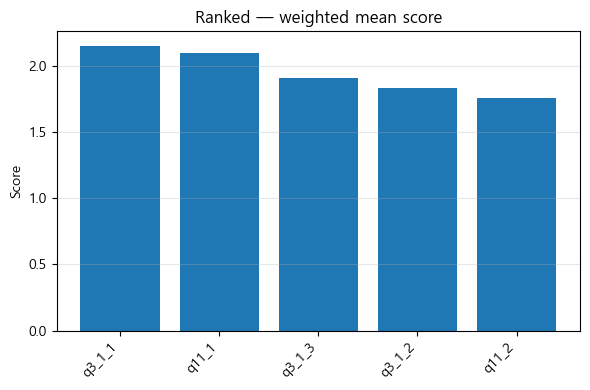

In [6]:

if df_ranked is not None and not df_ranked.empty:
    rk = df_ranked.copy().sort_values("weighted_mean_score", ascending=False)
    fig, ax = plt.subplots(figsize=(max(6, 0.4*len(rk)), 4))
    ax.bar(rk["variable"].astype(str), rk["weighted_mean_score"].astype(float))
    ax.set_title("Ranked — weighted mean score")
    ax.set_ylabel("Score")
    ax.set_xticklabels(rk["variable"].astype(str), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    fig.tight_layout()
    fig.savefig(OUT_DIR/"ranked_weighted_mean_score.png", dpi=DPI)


## Categorical-ordinal — Weighted distribution

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

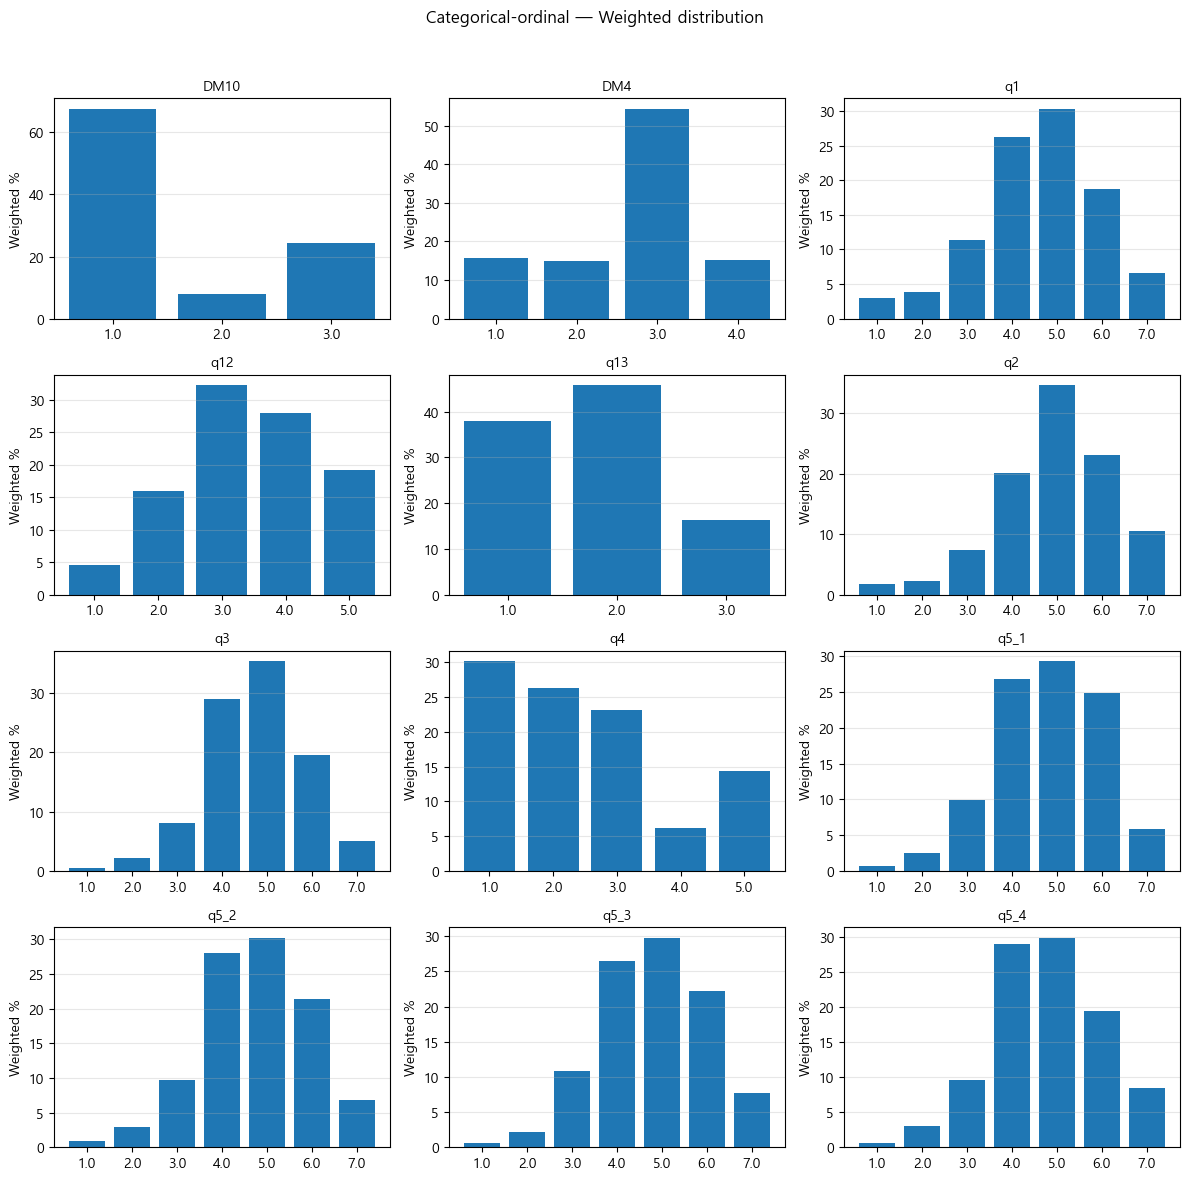

In [7]:

if df_ordcat is not None and not df_ordcat.empty:
    vars_ord = sorted(df_ordcat["variable"].astype(str).unique().tolist())
    if TOP_K and TOP_K>0:
        vars_ord = vars_ord[:TOP_K]
    n = len(vars_ord); cols=3; rows=int(np.ceil(n/cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten() if n>1 else [axes]

    for i, v in enumerate(vars_ord):
        sub = df_ordcat[df_ordcat["variable"].astype(str)==v].copy()
        sub["level_order"] = pd.to_numeric(sub["level"], errors="coerce")
        sub = sub.sort_values(["level_order","level"])
        grid_bar(axes[i], sub["level"].astype(str).tolist(), sub["weighted_%"].astype(float).tolist(),
                 f"{v}", ylabel="Weighted %")
    for j in range(i+1, rows*cols):
        axes[j].axis('off')

    fig.suptitle("Categorical-ordinal — Weighted distribution", fontsize=12)
    fig.tight_layout(rect=[0,0,1,0.96])
    fig.savefig(OUT_DIR/"categorical_ordinal_grid.png", dpi=DPI)


## Spearman — q3 / q7 상관 랭킹

C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\3214501763.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub["var"].astype(str), rotation=45, ha='right')
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGo

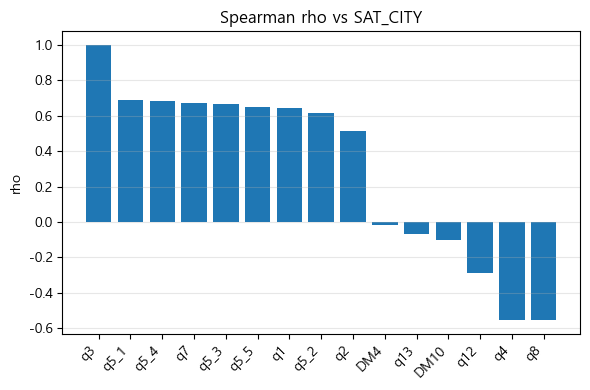

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

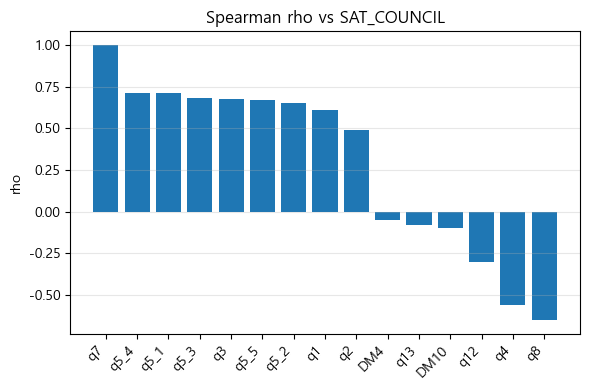

In [8]:

if df_spear is not None and not df_spear.empty:
    for tgt in sorted(df_spear["target"].astype(str).unique()):
        sub = df_spear[df_spear["target"].astype(str)==tgt].copy()
        sub = sub.sort_values("spearman_rho", ascending=False)
        fig, ax = plt.subplots(figsize=(max(6, 0.4*len(sub)), 4))
        ax.bar(sub["var"].astype(str), sub["spearman_rho"].astype(float))
        ax.set_title(f"Spearman rho vs {tgt}")
        ax.set_ylabel("rho")
        ax.set_xticklabels(sub["var"].astype(str), rotation=45, ha='right')
        ax.grid(axis='y', alpha=0.3)
        fig.tight_layout()
        fig.savefig(OUT_DIR/f"spearman_{tgt}.png", dpi=DPI)


## Nominal — Weighted distribution

C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\1752700444.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=rotate, ha='right')
C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\1752700444.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=rotate, ha='right')
C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\1752700444.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=rotate, ha='right')
C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\1752700444.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=

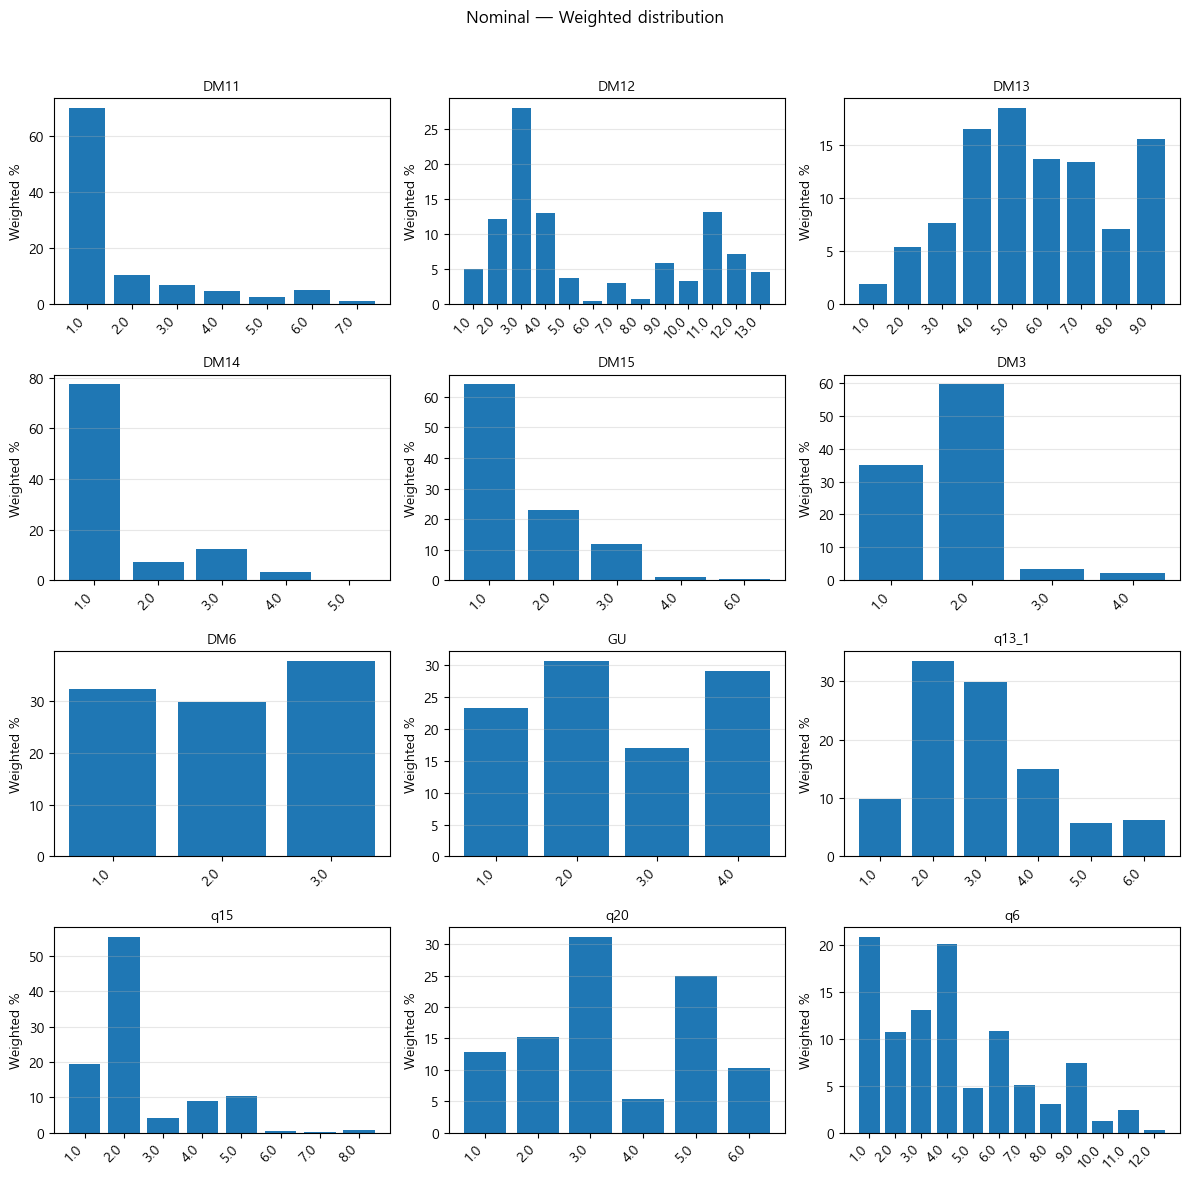

In [9]:

if df_nom is not None and not df_nom.empty:
    vars_nom = sorted(df_nom["variable"].astype(str).unique().tolist())
    if TOP_K and TOP_K>0:
        vars_nom = vars_nom[:TOP_K]
    n = len(vars_nom); cols=3; rows=int(np.ceil(n/cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten() if n>1 else [axes]

    for i, v in enumerate(vars_nom):
        sub = df_nom[df_nom["variable"].astype(str)==v]
        grid_bar(axes[i], sub["level"].astype(str).tolist(), sub["weighted_%"].astype(float).tolist(),
                 f"{v}", ylabel="Weighted %", rotate=45)
    for j in range(i+1, rows*cols):
        axes[j].axis('off')

    fig.suptitle("Nominal — Weighted distribution", fontsize=12)
    fig.tight_layout(rect=[0,0,1,0.96])
    fig.savefig(OUT_DIR/"nominal_grid.png", dpi=DPI)


## Binary — Prevalence & Correlation

C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\3642613545.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(b["variable"].astype(str), rotation=90, ha='right')
findfont: Font family 'AppleGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

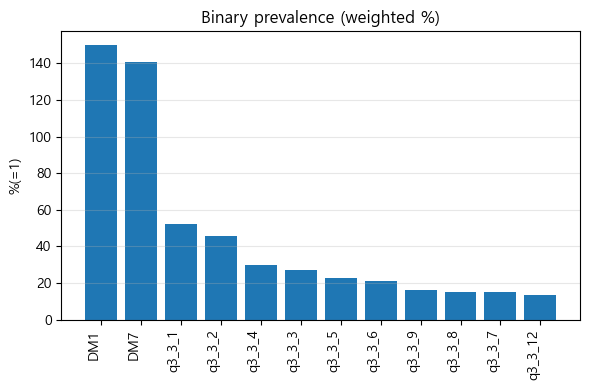

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

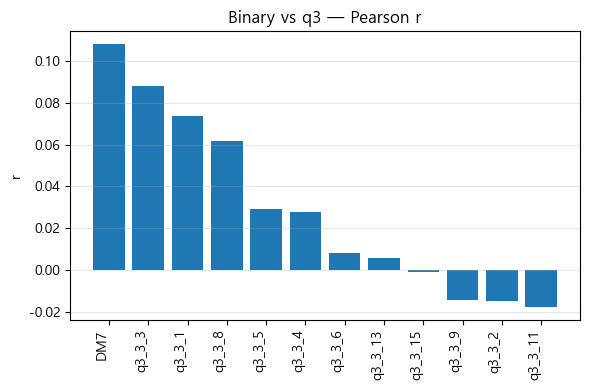

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

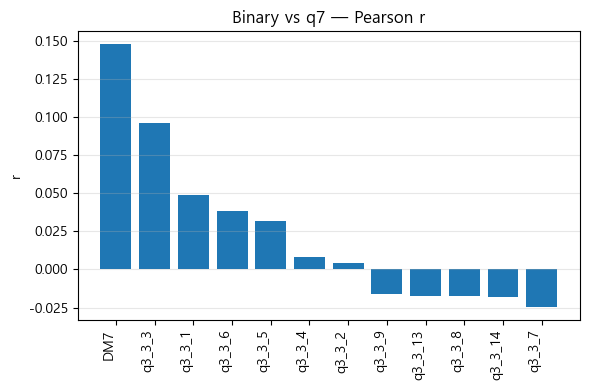

In [10]:

if df_bin is not None and not df_bin.empty:
    b = df_bin.copy().sort_values("weighted_%(=1)", ascending=False)
    if TOP_K and TOP_K>0: b = b.head(TOP_K)
    fig, ax = plt.subplots(figsize=(max(6, 0.4*len(b)), 4))
    ax.bar(b["variable"].astype(str), b["weighted_%(=1)"].astype(float))
    ax.set_title("Binary prevalence (weighted %)")
    ax.set_ylabel("%(=1)")
    ax.set_xticklabels(b["variable"].astype(str), rotation=90, ha='right')
    ax.grid(axis='y', alpha=0.3)
    fig.tight_layout()
    fig.savefig(OUT_DIR/"binary_prevalence_weighted.png", dpi=DPI)

if df_bin_corr is not None and not df_bin_corr.empty:
    for tgt in sorted(df_bin_corr["target"].astype(str).unique()):
        sub = df_bin_corr[df_bin_corr["target"].astype(str)==tgt].copy()
        sub = sub.sort_values("pearson_r", ascending=False)
        if TOP_K and TOP_K>0: sub = sub.head(TOP_K)
        fig, ax = plt.subplots(figsize=(max(6, 0.4*len(sub)), 4))
        ax.bar(sub["var"].astype(str), sub["pearson_r"].astype(float))
        ax.set_title(f"Binary vs {tgt} — Pearson r")
        ax.set_ylabel("r")
        ax.set_xticklabels(sub["var"].astype(str), rotation=90, ha='right')
        ax.grid(axis='y', alpha=0.3)
        fig.tight_layout()
        fig.savefig(OUT_DIR/f"binary_corr_{tgt}.png", dpi=DPI)


## GU × q3 / q7 — Heatmap

C:\Users\skybl\AppData\Local\Temp\ipykernel_22088\2881163402.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.

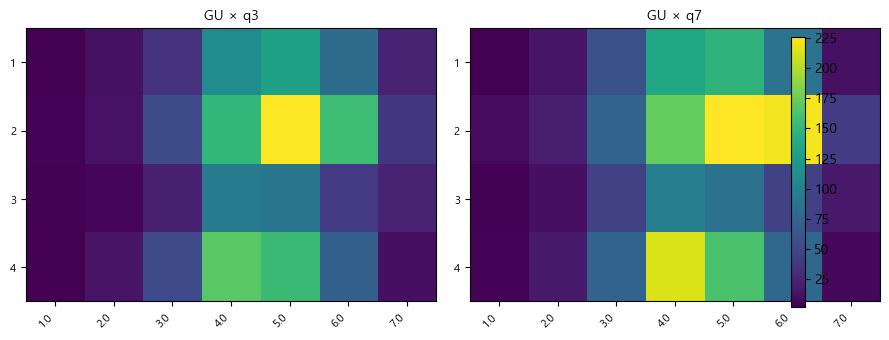

In [11]:

def read_ct(path):
    try:
        return pd.read_csv(path, index_col=0) if path else None
    except Exception:
        return None

df_guq3_ct = read_ct(gu_q3_ct)
df_guq7_ct = read_ct(gu_q7_ct)

if (df_guq3_ct is not None and not df_guq3_ct.empty) or (df_guq7_ct is not None and not df_guq7_ct.empty):
    cols = 2; rows = 1
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4.5, rows*3.5))
    if cols==1: axes=[axes]
    ims = []
    if df_guq3_ct is not None and not df_guq3_ct.empty:
        ims.append(grid_heatmap(axes[0], df_guq3_ct, "GU × q3"))
    else:
        axes[0].axis('off')
    if df_guq7_ct is not None and not df_guq7_ct.empty:
        ims.append(grid_heatmap(axes[1], df_guq7_ct, "GU × q7"))
    else:
        axes[1].axis('off')
    if ims:
        fig.colorbar(ims[0], ax=axes, fraction=0.02, pad=0.02)
    fig.tight_layout()
    fig.savefig(OUT_DIR/"GU_heatmaps.png", dpi=DPI)


## PDF로 묶기

In [12]:

pdf_path = OUT_DIR / "SRI_viz_report_compact.pdf"
with PdfPages(pdf_path) as pdf:
    for png in sorted(OUT_DIR.glob("*.png")):
        fig = plt.figure()
        img = plt.imread(png)
        plt.imshow(img)
        plt.axis('off')
        plt.title(png.name, fontsize=8)
        pdf.savefig(fig)
        plt.close(fig)

print("[OK] Compact visuals saved to:", OUT_DIR.resolve())
print("[OK] PDF:", pdf_path.resolve())


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

[OK] Compact visuals saved to: C:\workspace\dacon_sri\output\2. SRI시민패널조사\Q3_2024\viz_compact
[OK] PDF: C:\workspace\dacon_sri\output\2. SRI시민패널조사\Q3_2024\viz_compact\SRI_viz_report_compact.pdf
